## Importing Modules

In [62]:
import numpy as np
import pandas as pd
import re
import string
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
from spacy import displacy
import en_core_web_sm

In [63]:
nlp = en_core_web_sm.load()

## Helper Functions

In [13]:
contractions_dict = { "ain't": "are not","aren't": "are not",
                        "can't": "cannot","can't've": "cannot have",
                        "'cause": "because","could've": "could have","couldn't": "could not",
                        "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                        "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                        "hasn't": "has not","haven't": "have not","he'd": "he would",
                        "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                        "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                        "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                        "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                        "it'd": "it would","it'd've": "it would have","it'll": "it will",
                        "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                        "mayn't": "may not","might've": "might have","mightn't": "might not", 
                        "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                        "mustn't've": "must not have", "needn't": "need not",
                        "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                        "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                        "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                        "she'll": "she will", "she'll've": "she will have","should've": "should have",
                        "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                        "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                        "there'd've": "there would have", "they'd": "they would",
                        "they'd've": "they would have","they'll": "they will",
                        "they'll've": "they will have", "they're": "they are","they've": "they have",
                        "to've": "to have","wasn't": "was not","we'd": "we would",
                        "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                        "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                        "what'll've": "what will have","what're": "what are", "what've": "what have",
                        "when've": "when have","where'd": "where did", "where've": "where have",
                        "who'll": "who will","who'll've": "who will have","who've": "who have",
                        "why've": "why have","will've": "will have","won't": "will not",
                        "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                        "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                        "y'all'd've": "you all would have","y'all're": "you all are",
                        "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                        "you'll": "you will","you'll've": "you will have", "you're": "you are",
                        "you've": "you have"
                        }


# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions=contractions_dict):
  def replace(match):
    # print(contractions_dict[match.group(0)])
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

def remove_digits(text):
  return re.sub('\w*\d\w*', "", text)

def remove_punctutation(text):
  return re.sub("[%s]" % re.escape(string.punctuation), "", text)

def replace(match):
    # print(contractions_dict[match.group(0)])
    return contractions_dict[match.group(0)]

def text_prep(column, reverse=True, frequency=False, word_number=20, pos=False):
    stopword = set(stopwords.words('english'))
    stopword

    contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
    word_list = []

    for text in column:
        
        # expand contractions
        text = contractions_re.sub(replace, text)

        # remove digits from text
        text = re.sub('\w*\d\w*', "", text)

        # remove punctuation
        text = re.sub("[%s]" % re.escape(string.punctuation), "", text)

        # remove links
        text = re.sub("(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)", "", text)

        words = text.split(" ")

        for word in words:
            if word.lower() not in stopword:
                word_list.extend(word.split(" "))

    prep_words = Counter(word_list)
    sorted_words = sorted(prep_words.items(), key=lambda x: x[1], reverse=reverse)


    if frequency:
        return sorted_words
    
    freq_words = []
    for i in range(word_number):
        if sorted_words[i][0] != "":
            freq_words.append(sorted_words[i][0])


    tags = []
    if pos:
        word_tags = nltk.pos_tag(word_list)

        for tag in word_tags:
            tags.append(tag[1])

        tags = Counter(tags)
        sorted_tags = sorted(tags.items(), key=lambda x: x[1], reverse=reverse)
        
        top_tags = []
        for i in range(word_number):
            top_tags.append(sorted_tags[i][0])
        return top_tags

        

    return freq_words


def post_length(column, data=data, output='max'):
    length =[]
    for text in column:
        length.append(len(text))

        # print(f"{len(text)} - {text}")

    length = np.array(length)

    if output == 'max':

        max_str = data[data[column].str.len() == data[column].str.len().max()][[column]].reset_index(drop=True).drop_duplicates()
        max_str["length"] = max_str[column].str.len()

        return max_str

    elif output == 'min':
        min_str = data[data[column].str.len() == data[column].str.len().min()][[column]].reset_index(drop=True).drop_duplicates()
        min_str["length"] = min_str[column].str.len()

        return min_str

## Reading Data-in

In [14]:
data = pd.read_csv("./bogleheads_all_data_investing_theory.csv")
data.head()

,post_id,post_date,post_title,post_author,post_text,reply_date,replier,reply_text,replier_posts_count
0,372603,2022-03-13,"""20 IRA Mistakes To Avoid""",Taylor Larimore,"Bogleheads: Christine Benz, Morningstar's Dir...",2022-03-13,rkhusky,Nice compilation of things often mentioned on ...,14330
1,372603,2022-03-13,"""20 IRA Mistakes To Avoid""",Taylor Larimore,"Bogleheads: Christine Benz, Morningstar's Dir...",2022-03-13,retired@50,It pays to learn the rules. Ms. Benz uses t...,9760
2,372603,2022-03-13,"""20 IRA Mistakes To Avoid""",Taylor Larimore,"Bogleheads: Christine Benz, Morningstar's Dir...",2022-03-13,JoMoney,That's an unfortunate mistake I've heard more ...,14640
3,375939,2022-04-21,Bonds: Specific Dollar Amount or Percentage of...,SimpleMan68,"When it comes to bonds, do you seek to maintai...",2022-04-21,yules,I think it really depends on your assets. Like...,527
4,375939,2022-04-21,Bonds: Specific Dollar Amount or Percentage of...,SimpleMan68,"When it comes to bonds, do you seek to maintai...",2022-04-21,dbr,There are people who would swear by either of ...,43427


#### Columns and Representation

* post_id - 
* post_date - Date on which the question was posted on the forum
* post_title - Title of the post asking the quetsion
* post_author - username of the question asker
* post_text - The text explaining the question
* reply_date - date on which the reply was posted
* repiler - Username for replier
* reply_text - text containing the answer to the posts
* replier_posts_counts - total number of posts made by the replier


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112679 entries, 0 to 112678
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   post_id              112679 non-null  int64 
 1   post_date            112679 non-null  object
 2   post_title           112679 non-null  object
 3   post_author          112261 non-null  object
 4   post_text            112427 non-null  object
 5   reply_date           112679 non-null  object
 6   replier              111441 non-null  object
 7   reply_text           112313 non-null  object
 8   replier_posts_count  112679 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 7.7+ MB


### Missing or Null values

In [16]:
data.isnull().sum()

post_id                   0
post_date                 0
post_title                0
post_author             418
post_text               252
reply_date                0
replier                1238
reply_text              366
replier_posts_count       0
dtype: int64

### Check duplicated

In [17]:
data.duplicated().sum()

204

In [18]:
data.dropna(inplace=True)
data.duplicated().sum()

191

In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110284 entries, 0 to 112678
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   post_id              110284 non-null  int64 
 1   post_date            110284 non-null  object
 2   post_title           110284 non-null  object
 3   post_author          110284 non-null  object
 4   post_text            110284 non-null  object
 5   reply_date           110284 non-null  object
 6   replier              110284 non-null  object
 7   reply_text           110284 non-null  object
 8   replier_posts_count  110284 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 8.4+ MB


In [21]:
data.head()

,post_id,post_date,post_title,post_author,post_text,reply_date,replier,reply_text,replier_posts_count
0,372603,2022-03-13,"""20 IRA Mistakes To Avoid""",Taylor Larimore,"Bogleheads: Christine Benz, Morningstar's Dir...",2022-03-13,rkhusky,Nice compilation of things often mentioned on ...,14330
1,372603,2022-03-13,"""20 IRA Mistakes To Avoid""",Taylor Larimore,"Bogleheads: Christine Benz, Morningstar's Dir...",2022-03-13,retired@50,It pays to learn the rules. Ms. Benz uses t...,9760
2,372603,2022-03-13,"""20 IRA Mistakes To Avoid""",Taylor Larimore,"Bogleheads: Christine Benz, Morningstar's Dir...",2022-03-13,JoMoney,That's an unfortunate mistake I've heard more ...,14640
3,375939,2022-04-21,Bonds: Specific Dollar Amount or Percentage of...,SimpleMan68,"When it comes to bonds, do you seek to maintai...",2022-04-21,yules,I think it really depends on your assets. Like...,527
4,375939,2022-04-21,Bonds: Specific Dollar Amount or Percentage of...,SimpleMan68,"When it comes to bonds, do you seek to maintai...",2022-04-21,dbr,There are people who would swear by either of ...,43427


In [22]:
data.groupby("post_title").count()[['post_id']].sort_values(
  by="post_id", ascending=False)

,post_id
post_title,
Trading Treasuries (nominal and TIPS),2227
New fee for Vanguard mutual accounts,1257
Why don't you factor tilt?,821
"Bill Bernstein: ""Playing Inflation Russian Roulette in Retirement""",773
Official Registration For The 2022 Boglehead Contest,687
...,...
Basic question: What comes first - decline in interest rates or decline in treasury yields?,1
allocation fund [How do I get total yearly performance?],1
analyse nr of holdings in multi-ETF portfolio,1


In [23]:
data["post_text"] = data['post_text'].apply(lambda x: expand_contractions(x))
data["post_title"] = data['post_title'].apply(lambda x: expand_contractions(x))
data["reply_text"] = data['post_text'].apply(lambda x: expand_contractions(x))

In [24]:
data['post_text'] = data['post_text'].str.lower()
data['post_title'] = data['post_title'].str.lower()
data['reply_text'] = data['reply_text'].str.lower()

In [25]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)

In [26]:
data['post_author'].unique()

array(['Taylor Larimore', 'SimpleMan68', 'oklabecca', ..., 'spencydub',
       'Ramec358', 'Lou Sevens'], dtype=object)

In [27]:
data['replier'].unique()

array(['rkhusky', 'retired@50', 'JoMoney', ..., 'curious george',
       'HoberMallow', 'benihanna'], dtype=object)

In [28]:
data["post_text"] = data['post_text'].apply(lambda x: remove_digits(x))
data["post_title"] = data['post_title'].apply(lambda x: remove_digits(x))
data["reply_text"] = data['post_text'].apply(lambda x: remove_digits(x))

In [29]:
data["post_text"] = data['post_text'].apply(lambda x: remove_punctutation(x))
data["post_title"] = data['post_title'].apply(lambda x: remove_punctutation(x))
data["reply_text"] = data['post_text'].apply(lambda x: remove_punctutation(x))

In [30]:
data.head()

,post_id,post_date,post_title,post_author,post_text,reply_date,replier,reply_text,replier_posts_count
0,372603,2022-03-13,ira mistakes to avoid,Taylor Larimore,bogleheads christine benz morningstars direct...,2022-03-13,rkhusky,bogleheads christine benz morningstars direct...,14330
1,372603,2022-03-13,ira mistakes to avoid,Taylor Larimore,bogleheads christine benz morningstars direct...,2022-03-13,retired@50,bogleheads christine benz morningstars direct...,9760
2,372603,2022-03-13,ira mistakes to avoid,Taylor Larimore,bogleheads christine benz morningstars direct...,2022-03-13,JoMoney,bogleheads christine benz morningstars direct...,14640
3,375939,2022-04-21,bonds specific dollar amount or percentage of ...,SimpleMan68,when it comes to bonds do you seek to maintain...,2022-04-21,yules,when it comes to bonds do you seek to maintain...,527
4,375939,2022-04-21,bonds specific dollar amount or percentage of ...,SimpleMan68,when it comes to bonds do you seek to maintain...,2022-04-21,dbr,when it comes to bonds do you seek to maintain...,43427


In [31]:
df = data.copy()

In [32]:
df.drop(['post_id', 'post_date', "post_author", "reply_date", "replier"], axis=1, inplace=True)

In [33]:
df

,post_title,post_text,reply_text,replier_posts_count
0,ira mistakes to avoid,bogleheads christine benz morningstars direct...,bogleheads christine benz morningstars direct...,14330
1,ira mistakes to avoid,bogleheads christine benz morningstars direct...,bogleheads christine benz morningstars direct...,9760
2,ira mistakes to avoid,bogleheads christine benz morningstars direct...,bogleheads christine benz morningstars direct...,14640
3,bonds specific dollar amount or percentage of ...,when it comes to bonds do you seek to maintain...,when it comes to bonds do you seek to maintain...,527
4,bonds specific dollar amount or percentage of ...,when it comes to bonds do you seek to maintain...,when it comes to bonds do you seek to maintain...,43427
...,...,...,...,...
112673,potential error on fidelity otc ytd dividendsc...,hello i believe i have an error and am wonderi...,hello i believe i have an error and am wonderi...,173
112675,potential error on fidelity otc ytd dividendsc...,hello i believe i have an error and am wonderi...,hello i believe i have an error and am wonderi...,1055
112676,potential error on fidelity otc ytd dividendsc...,hello i believe i have an error and am wonderi...,hello i believe i have an error and am wonderi...,553
112677,potential error on fidelity otc ytd dividendsc...,hello i believe i have an error and am wonderi...,hello i believe i have an error and am wonderi...,173


### Lemmatization

In [34]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/mohamed/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/mohamed/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
from nltk.stem import WordNetLemmatizer

In [36]:
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("splendid"))

splendid


In [37]:
def lemmatize_text(text):

  lemmatizer = WordNetLemmatizer()

  words = text.split(" ")
  lem_words = []

  for word in words:
    lem_words.append(lemmatizer.lemmatize(word))

  return " ".join(lem_words)

In [38]:
lemmatize_text(df['post_text'][0])

'bogleheads  christine benz morningstars director of personal finance ha written this excellent and timely article about mistake we make with our ira     ira mistake to avoid  best wish taylor'

In [39]:
df['post_text'] = df["post_text"].apply(lambda x: lemmatize_text(x))
df['post_title'] = df["post_title"].apply(lambda x: lemmatize_text(x))
df['reply_text'] = df["reply_text"].apply(lambda x: lemmatize_text(x))

### Removing Stopwords

In [40]:
stopword = set(stopwords.words('english'))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Most common words in question post title

In [42]:
text_prep(data['post_title'], reverse=True)

['market',
 'vanguard',
 'bonds',
 'bond',
 'funds',
 'fund',
 'tips',
 'stocks',
 'vs',
 'retirement',
 'investing',
 'new',
 'portfolio',
 'stock',
 'inflation',
 'value',
 'money',
 'time',
 'international']

### Most common words in question post

In [43]:
text_prep(data['post_text'], reverse=True)

['market',
 'would',
 'year',
 'fund',
 'tips',
 'portfolio',
 'years',
 'bond',
 'funds',
 'bonds',
 'like',
 'stocks',
 'one',
 'stock',
 'inflation',
 'us',
 'time',
 'much',
 'vanguard']

### Most common words in replies

In [44]:
text_prep(data['reply_text'], reverse=True)

['market',
 'would',
 'year',
 'fund',
 'tips',
 'portfolio',
 'years',
 'bond',
 'funds',
 'bonds',
 'like',
 'stocks',
 'one',
 'stock',
 'inflation',
 'us',
 'time',
 'much',
 'vanguard']

### Total Number of Unique words in Post titles

In [45]:
len(text_prep(data['post_title'], reverse=True, frequency=True))

4258

### Number of Unique words in post text

In [46]:
len(text_prep(data['post_text'], reverse=True, frequency=True))

18096

### Number of unique words in post answer

In [47]:
len(text_prep(data['reply_text'], reverse=True, frequency=True))

18096

### Maximum length of questions

In [48]:
post_length(column="post_text")

,post_text,length
0,"Hello fellow Bogleheads, I have an investment...",16469


### Maximum length of answers

In [49]:
post_length(column="reply_text")

,reply_text,length
0,Thanks for this example. I do have some questi...,26256


### Minimum length of questions

In [50]:
post_length(column="post_text", output="min")

,post_text,length
0,Why?,4


### Minimum length of answers

In [51]:
post_length(column="reply_text", output="min")

,reply_text,length
0,.,1
1,♠,1
2,↑,1


### Average length of questions

In [52]:
avg = int(np.mean(data["post_text"].str.len()))
print(f"Average length of questions: {avg}")

Average length of questions: 899


### Average length of answers

In [53]:
avg = int(np.mean(data["reply_text"].str.len()))
print(f"Average length of answers: {avg}")

Average length of answers: 899


### Most common part of speech tags

In [54]:
question_pos = text_prep(data["post_text"], pos=True)

In [55]:
answer_pos = text_prep(data["reply_text"], pos=True)

In [56]:
question_pos

['NN',
 'JJ',
 'NNS',
 'NNP',
 'VBP',
 'RB',
 'VBG',
 'VBD',
 'VB',
 'VBZ',
 'VBN',
 'IN',
 'MD',
 'CD',
 'JJR',
 'PRP',
 'JJS',
 'RBR',
 'FW',
 'DT']

In [57]:
answer_pos

['NN',
 'JJ',
 'NNS',
 'NNP',
 'VBP',
 'RB',
 'VBG',
 'VBD',
 'VB',
 'VBZ',
 'VBN',
 'IN',
 'MD',
 'CD',
 'JJR',
 'PRP',
 'JJS',
 'RBR',
 'FW',
 'DT']

### Most occuring named entities in Questions

In [109]:
tags = []

for text in data['post_text'].drop_duplicates():
  doc = nlp(text)
  tags.extend([(x.text, x.label_) for x in doc.ents])

Counter(tags)
sorted(Counter(tags).items(), key=lambda x: x[1], reverse=True)

[(('years', 'DATE'), 561),
 (('one', 'CARDINAL'), 395),
 (('today', 'DATE'), 335),
 (('two', 'CARDINAL'), 317),
 (('year', 'DATE'), 286),
 (('first', 'ORDINAL'), 286),
 (('roth', 'PERSON'), 277),
 (('fed', 'ORG'), 204),
 (('treasury', 'ORG'), 196),
 (('annual', 'DATE'), 176),
 (('us', 'GPE'), 171),
 (('fidelity', 'ORG'), 170),
 (('this year', 'DATE'), 161),
 (('monthly', 'DATE'), 154),
 (('three', 'CARDINAL'), 120),
 (('sec', 'ORG'), 107),
 (('zero', 'CARDINAL'), 105),
 (('irs', 'ORG'), 91),
 (('second', 'ORDINAL'), 80),
 (('the year', 'DATE'), 79),
 (('taylor', 'PERSON'), 78),
 (('the john c bogle center for financial literacy', 'ORG'), 74),
 (('a  year', 'DATE'), 74),
 (('months', 'DATE'), 72),
 (('february', 'DATE'), 68),
 (('a year', 'DATE'), 66),
 (('april', 'DATE'), 66),
 (('january', 'DATE'), 64),
 (('month', 'DATE'), 60),
 (('october', 'DATE'), 60),
 (('december', 'DATE'), 59),
 (('the next  years', 'DATE'), 55),
 (('daily', 'DATE'), 54),
 (('roth ira', 'PERSON'), 53),
 (('annu

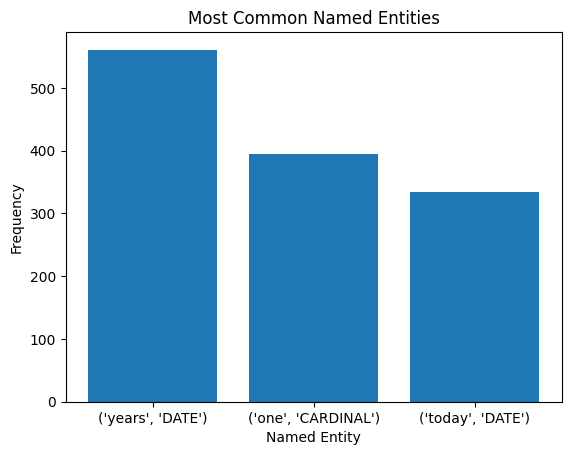

In [110]:
import matplotlib.pyplot as plt

# Extract the named entities and their frequencies from the counter
entities, frequencies = zip(*counter[:3])

# Convert the named entities to strings
entities = [str(e) for e in entities]

# Plot the named entities as a bar chart
plt.bar(entities, frequencies)
plt.xlabel('Named Entity')
plt.ylabel('Frequency')
plt.title('Most Common Named Entities')
plt.show()


### What are the common named entities in the answers ?

In [65]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mohamed/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/mohamed/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/mohamed/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [67]:
tags = []

for text in data['reply_text'].drop_duplicates():
  doc = nlp(text)
  tags.extend([(x.text, x.label_) for x in doc.ents])

Counter(tags)
counter = sorted(Counter(tags).items(), key=lambda x: x[1], reverse=True)

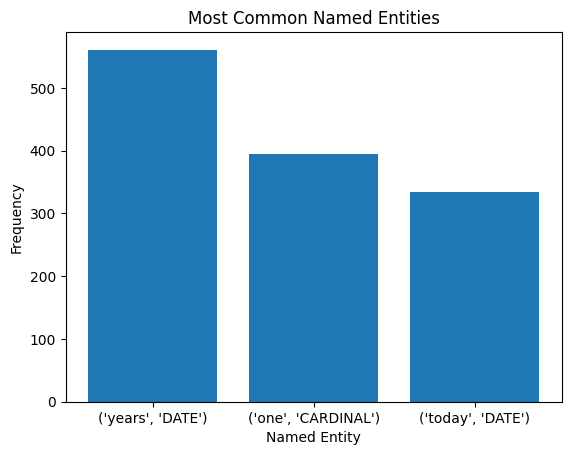

In [77]:
import matplotlib.pyplot as plt

# Extract the named entities and their frequencies from the counter
entities, frequencies = zip(*counter[:3])

# Convert the named entities to strings
entities = [str(e) for e in entities]

# Plot the named entities as a bar chart
plt.bar(entities, frequencies)
plt.xlabel('Named Entity')
plt.ylabel('Frequency')
plt.title('Most Common Named Entities')
plt.show()


### What are the common themes or topics in the questions?

In [103]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

def preprocess(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([c for c in text if c not in string.punctuation])
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [t for t in tokens if t not in stopwords]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    return tokens

# Pre-process the "questions" column
questions = df['post_title']
question_tokens = [preprocess(q) for q in questions]

In [104]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Create a dictionary from the question text
dictionary = Dictionary(question_tokens)

# Create a bag-of-words representation of the question text
bow_corpus = [dictionary.doc2bow(q) for q in question_tokens]

# Train the LDA model
lda = LdaModel(bow_corpus, num_topics=10, id2word=dictionary)

# Print the topics
for i, topic in lda.show_topics(formatted=True):
    print(f"Topic {i}: {topic}")


Topic 0: 0.124*"value" + 0.101*"fund" + 0.046*"gold" + 0.043*"live" + 0.033*"ha" + 0.031*"investment" + 0.026*"ibonds" + 0.025*"bill" + 0.023*"bogleheads®" + 0.022*"date"
Topic 1: 0.177*"bond" + 0.077*"income" + 0.059*"inflation" + 0.048*"asset" + 0.046*"fund" + 0.040*"yield" + 0.037*"loss" + 0.030*"tax" + 0.029*"lot" + 0.028*"account"
Topic 2: 0.104*"time" + 0.089*"equity" + 0.072*"investing" + 0.055*"allocation" + 0.047*"price" + 0.034*"expense" + 0.033*"estate" + 0.030*"real" + 0.028*"aa" + 0.026*"stay"
Topic 3: 0.158*"new" + 0.094*"whats" + 0.073*"dividend" + 0.055*"much" + 0.045*"sp" + 0.039*"know" + 0.024*"anyone" + 0.024*"maybe" + 0.023*"withdrawal" + 0.023*"believe"
Topic 4: 0.057*"money" + 0.056*"tilt" + 0.052*"fidelity" + 0.048*"security" + 0.047*"social" + 0.046*"question" + 0.041*"going" + 0.040*"’" + 0.037*"investor" + 0.029*"call"
Topic 5: 0.202*"market" + 0.136*"stock" + 0.052*"fund" + 0.038*"index" + 0.034*"u" + 0.032*"v" + 0.031*"total" + 0.030*"financial" + 0.022*"use

In [105]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
vis = pyLDAvis.gensim_models.prepare(lda, bow_corpus, dictionary)
pyLDAvis.display(vis)

### What are the common themes or topics in the answers ?

In [106]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

def preprocess(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([c for c in text if c not in string.punctuation])
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [t for t in tokens if t not in stopwords]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    return tokens

# Pre-process the "questions" column
answers = df['reply_text']
answer_tokens = [preprocess(q) for q in questions]

In [107]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Create a dictionary from the question text
dictionary = Dictionary(answer_tokens)

# Create a bag-of-words representation of the question text
bow_corpus = [dictionary.doc2bow(q) for q in answer_tokens]

# Train the LDA model
lda = LdaModel(bow_corpus, num_topics=10, id2word=dictionary)

# Print the topics
for i, topic in lda.show_topics(formatted=True):
    print(f"Topic {i}: {topic}")


Topic 0: 0.106*"equity" + 0.103*"return" + 0.081*"money" + 0.079*"tilt" + 0.066*"question" + 0.058*"’" + 0.031*"ratio" + 0.030*"factor" + 0.029*"expected" + 0.026*"customer"
Topic 1: 0.150*"fund" + 0.108*"vanguard" + 0.103*"etf" + 0.085*"v" + 0.049*"international" + 0.039*"index" + 0.031*"total" + 0.025*"fidelity" + 0.022*"future" + 0.022*"invest"
Topic 2: 0.087*"inflation" + 0.075*"rate" + 0.056*"loss" + 0.033*"much" + 0.032*"article" + 0.027*"date" + 0.027*"distribution" + 0.026*"bubble" + 0.026*"interest" + 0.025*"stay"
Topic 3: 0.111*"year" + 0.058*"yield" + 0.055*"avantis" + 0.049*"hedge" + 0.040*"ha" + 0.036*"bogleheads" + 0.032*"long" + 0.032*"expense" + 0.031*"ibonds" + 0.029*"real"
Topic 4: 0.134*"treasury" + 0.114*"tip" + 0.090*"going" + 0.078*"account" + 0.065*"tax" + 0.051*"jeremy" + 0.034*"understand" + 0.032*"cd" + 0.026*"number" + 0.025*"check"
Topic 5: 0.181*"stock" + 0.105*"portfolio" + 0.051*"gold" + 0.051*"whats" + 0.045*"u" + 0.039*"dividend" + 0.039*"lot" + 0.038*"

In [108]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
vis = pyLDAvis.gensim_models.prepare(lda, bow_corpus, dictionary)
pyLDAvis.display(vis)

### How many questions in the dataset?

In [85]:
unique_questions = df["post_title"].unique()
len(unique_questions)

3648

### How many answers in the dataset?

In [86]:
unique_answers = df["reply_text"].unique()
len(unique_answers)

3654

### What is the ratio of questions to answers in the dataset?

In [87]:
ratio = len(unique_questions) / len(unique_answers)
ratio

0.9983579638752053

### Are the questions and answers balanced in the dataset ?

In [88]:
if ratio > 0.9 and ratio < 1.1:
    print("The questions and answers are balanced.")
else:
    print("The questions and answers are imbalanced.")

The questions and answers are balanced.


### Are the questions and answers diverse in the dataset?

In [89]:
num_unique_questions = df['post_title'].nunique()
num_total_questions = df['post_title'].count()
ratio_questions = num_unique_questions / num_total_questions

num_unique_answers = df['reply_text'].nunique()
num_total_answers = df['reply_text'].count()
ratio_answers = num_unique_answers / num_total_answers

print(f"The ratio of unique questions to total questions is: {ratio_questions:.2f}")
print(f"The ratio of unique answers to total answers is: {ratio_answers:.2f}")


The ratio of unique questions to total questions is: 0.05
The ratio of unique answers to total answers is: 0.05


### Are the questions and answers relevant to the topic of inflation and recession?

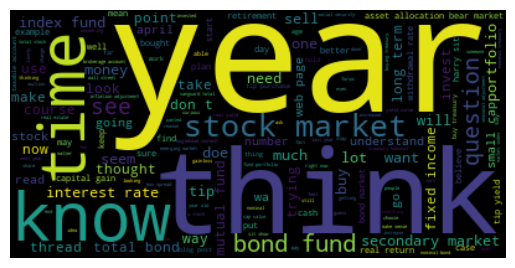

In [90]:
import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate the "questions" and "answers" columns into a single text
text = df['post_title'].str.cat(df['post_text'], sep=' ').str.cat(df['reply_text'], sep=' ')

# Create the word cloud
wordcloud = WordCloud().generate(' '.join(text.to_list()))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Are the questions and answers written in clear and concise language?

In [91]:
from textstat.textstat import textstat

# Calculate the Flesch Reading Ease scores for the questions and answers
questions_scores = df['post_title'].apply(textstat.flesch_reading_ease)
answers_scores = df['reply_text'].apply(textstat.flesch_reading_ease)

# Print the mean scores
print(f"The mean Flesch Reading Ease score for the questions is: {questions_scores.mean():.2f}")
print(f"The mean Flesch Reading Ease score for the answers is: {answers_scores.mean():.2f}")


The mean Flesch Reading Ease score for the questions is: 63.15
The mean Flesch Reading Ease score for the answers is: -79.58


### Are the questions and answers written in a consistent style and tone? 

In [92]:
from textblob import TextBlob

# Calculate the sentiment of the questions and answers
questions_sentiment = df['post_title'].apply(lambda x: TextBlob(x).sentiment.polarity)
answers_sentiment = df['reply_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Print the mean sentiments
print(f"The mean sentiment of the questions is: {questions_sentiment.mean():.2f}")
print(f"The mean sentiment of the answers is: {answers_sentiment.mean():.2f}")


The mean sentiment of the questions is: 0.04
The mean sentiment of the answers is: 0.10


### Are the answers provided for all the questions in the dataset?

In [93]:
df['has_answer'] = df['reply_text'].apply(lambda x: 1 if x else 0)

In [94]:
counts = df.groupby('post_title')['has_answer'].sum()

In [95]:
# Count the number of questions that have answers
num_questions_with_answers = counts[counts > 0].count()

In [96]:
percentage = num_questions_with_answers / df['post_title'].count() * 100

In [97]:
percentage

5.117336626993038

### Are the answers provided for none of the questions in the dataset?

In [98]:
df['has_answer'] = df['reply_text'].apply(lambda x: 1 if x else 0)

In [99]:
counts = df.groupby('post_title')['has_answer'].sum()

In [100]:
num_questions_with_answers = counts[counts > 0].count()

In [101]:
if num_questions_with_answers == 0:
    print("None of the questions have corresponding answers.")
else:
    print("Some of the questions have corresponding answers.")

Some of the questions have corresponding answers.
